# Lecture 9.2

# Sample project - updates


I am going to work on a project this term as well, and will post updates each week so you can see how I am progressing.

It would be useful if each of you were to post updates as well. Not formal reports, but a weekly "to do" list, and "what has been done" list.

### Introduction.

A pendulum, put upside down, is in an unstable system. It is an interesting feedback control problem to monitor the pendulum, and make it remain upside down. Even stable under small, forced perturbations.

This is a classical problem for engineers.

Here are some videos:


In [1]:
from IPython.display import YouTubeVideo

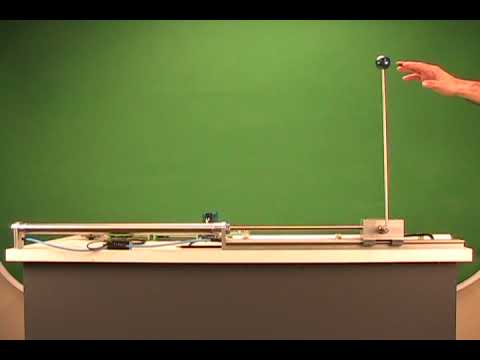

In [2]:
YouTubeVideo('a4c7AwHFkT8')

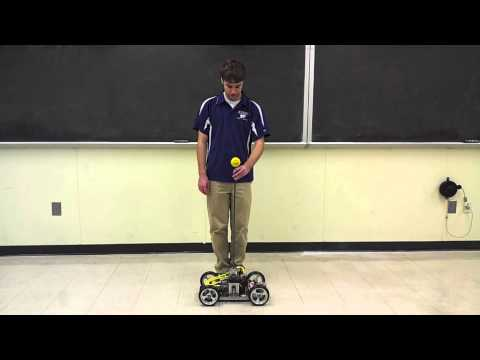

In [3]:
YouTubeVideo('AuAZ5zOP0yQ') 

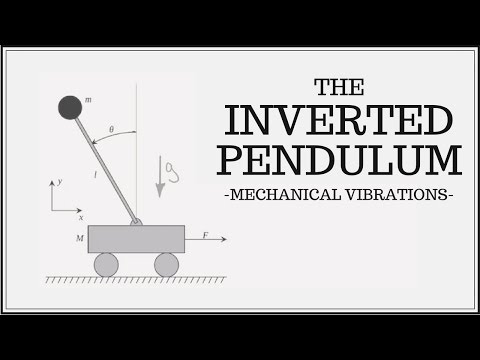

In [4]:
# The equations of motions are derived here
YouTubeVideo('7Tvo8jXlPuk')

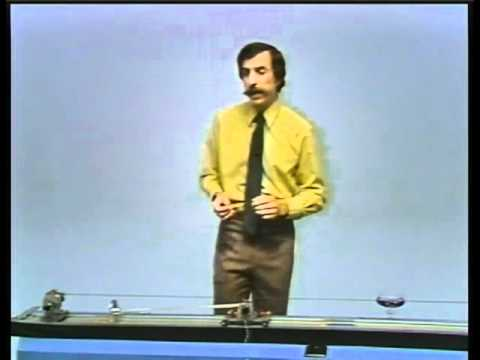

In [5]:
# The famous Alan Oppenheimer explains how to set up the feedback control system
YouTubeVideo('D3bblng-Kcc')

## Goal

The example above are all rather large physical systems (hydralic actuator, a mobile cart, and a wire and pulley system). We would like to build something small, self-contained, fits on a desktop. 

Ideally, we would like a fist-sized block of metal with an actuator on top, that can hold a pencil balanced on top.

A simpler goal -- a pencil-like object, with a small sensor attached to it, that is balanced by a small device.

## Equations of motion

See above videos. Let's write them out as an exercise in class.

## Control equations

I'm not sure I have enough information on this. Let's look at a Matlab experiment (video) and see if we can duplicate it. Either in Matlab or in Python. (Maybe both, as a class exercise.)

See this video:

YouTubeVideo('KO0LX6dnOhQ') 






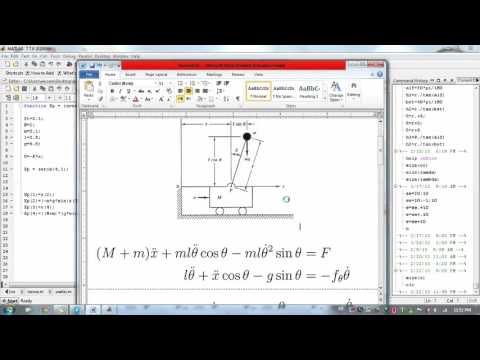

In [6]:
YouTubeVideo('KO0LX6dnOhQ') 

## Choices

Do we want to use a microcontroller to control the system? Or can we build an analogue system (with op amps and power transistors)?

## Sensors

A cheap, easy choices is a 3D accelerometer. It is about the size of a dime, and measures acceleration in 3 orthogonal axes. Can that be used? Note it does not measure position, but as it is sensitive to the force of gravity, we might be able to deduce position directly.

A magnetic sensor, consisting of a Hall effect sensor (maybe 2 to 4 of them) and a magnet on the pencil.

A infrared light sensor, that measures the proximity of the pencil. This would be ideal, as nothing needs to be attached to the pencil. But, might be hard!

## Actuators

Classically, people use a stepper motor. 

Can we use a spring/electromagnet coiled loosely around a rare earth magnet?

Can we use some type of piezo-electric actuator, small and fast?



## First steps

Wow, we have a real shortage of diagrams. That's partly because I am lazy, partly because I don't have any obvious tools to draw nice diagrams.

I've been using Scribble. How about PowerPoint? Just save as a .png file and we are good.

![Pendulum on cart](img/Pend.png)

So above, we have a cart of mass $M$ moving frictionlessly on wheels. There is a force $F$ pulling on it. The pendulum is fixed to the cart, it has length $l$ (not shown) and the mass of the pendulum bob is $m$. The angle $\theta$ measures how far off we are from vertical. 

Let's write down the equations of motion and the control, and determine if an accelerometer can be used in the feedback loop. (The accelerometer sends out an analog signal, that would need to be digitized.)

## Lagrange equations.

From the video, we know we need to compute the Lagragian, as the difference of two energies, kinetic $T$ and potential $V$ (these are standard notations in Lagragian formulation).

$$ L = T - V.$$

The potential energy is due to gravity, and equals the height of the bob above some neutral point (say the top of the cart), times mass, times gravity. This gives us
$$ V = m g l \cos\theta. $$

The kinetic enery has two parts. First from the motion of the cart, which gives $\frac{1}{2} M \dot{x}^2$, where $\dot{x}$ is the velocity of the cart. Second is $\frac{1}{2} m v^2$, where $v = (v_x,v_y)$ is the velocity of the pendulum bob, which has a horizontal component $v_x = \dot{x} - l \dot{\theta}\cos\theta$ and vertical component $v_y = l\dot{\theta}\sin\theta$.

We expand to get
$$T = \frac{1}{2} M \dot{x}^2 + \frac{1}{2} m (v_x^2 + v_y^2)
= \frac{1}{2} M \dot{x}^2 + \frac{1}{2} m (\dot{x} - l \dot{\theta}\cos\theta)^2 +
\frac{1}{2} m (l\dot{\theta}\sin\theta)^2.$$

A bit of algebra, and a trig identity gives
$$ T = \frac{1}{2} (M + m)\dot{x}^2 - m l \dot{x} \dot{\theta}\cos\theta + \frac{1}{2}m l^2 \dot{\theta}^2.$$

We end up with the Lagrangian
$$ L = \frac{1}{2} (M + m)\dot{x}^2 - m l \dot{x} \dot{\theta}\cos\theta + \frac{1}{2}m l^2 \dot{\theta}^2 - m g l \cos\theta.$$


Following the video, we compute Lagrange equations as
$$\frac{d}{dt}\left( \frac{\partial L}{\partial \dot{x}} \right) - \frac{\partial L}{\partial x} = F$$
and
$$\frac{d}{dt}\left( \frac{\partial L}{\partial \dot{\theta}} \right) - \frac{\partial L}{\partial \theta} = 0.$$

These are easy derivatives (he does it in the video) and we get:

$$ (M+m)\ddot{x} - ml\ddot{\theta} \cos\theta + ml \dot{\theta}^2 \sin\theta = F$$
$$ - \ddot{x} \cos\theta + l \ddot{\theta} - g\sin\theta = 0$$

We will want to solve for $\ddot{x}, \ddot{\theta}$ so let's express this as a 2 by 2 matrix system that we can solve.

$$
\left[
\begin{array}{cc}
M+m & -m  \\
-1 & 1
\end{array}
\right]
\left[
\begin{array}{c}
\ddot{x} \\
l \ddot{\theta}
\end{array}
\right]
=
\left[
\begin{array}{c}
F - m l \dot{\theta}\sin\theta \\
g\sin\theta
\end{array}
\right]
$$

Inverting, we have
$$
\left[
\begin{array}{c}
\ddot{x} \\
l \ddot{\theta}
\end{array}
\right]
=
\frac{1}{M}
\left[
\begin{array}{cc}
1 & m  \\
1 & M+m
\end{array}
\right]
\left[
\begin{array}{c}
F - m l \dot{\theta}\sin\theta \\
g\sin\theta
\end{array}
\right]
$$

Do I need to write this out? Might as well, since we need it in our ODE code to follow.

$$ \ddot{x} = \frac{1}{M}(F - ml\dot{\theta}\sin\theta - mg\sin\theta),$$
$$ l \ddot{\theta} = \frac{1}{M}( F - ml\dot{\theta}\sin\theta + (M+m)g\sin\theta).$$

## Doing the ODE system numerically.

Okay, we have seen these examples before. But let's try it out here.

We will call odeint (from scipy), using a function that defines the right hand side (rhs) of the ODE system.

Our four variables are $[x_1,x_2,x_3,x_4] = [x, \dot{x}, l\theta,l\dot{\theta}]$. I'm using "l" times theta cause it looks nice. 

In [7]:
import numpy as np
from scipy.integrate import odeint

In [8]:
def rhs(x,t,M,m,g,l):
    x1,x2,x3,x4 = x
    return [x2,(0-m*x4*np.sin(x3/l) - m*g*np.sin(x3/l))/M,x4,(0-m*x4*np.sin(x3/l) + (M+m)*g*np.sin(x3/l))/M]

M = 1
m = .01
g = 9.8
l = 1

x_init = [0,0,.1,0]
t=np.linspace(0,15,3000)
x_out = odeint(rhs,x_init,t,args=(M,m,g,l))

x1,x2,x3,x4 = x_out[:,0],x_out[:,1],x_out[:,2],x_out[:,3]

In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

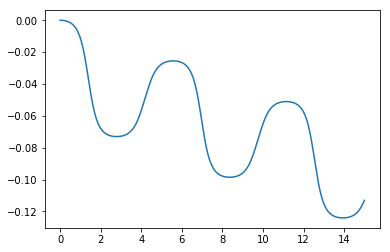

In [11]:
plt.plot(t,x1)

Cool!

The diagram suggests the cart is wiggling around as the pendulum swings. (As it should!)

Now, we want to introduce some kind of feedback force $F$ that will stablize the system in an upright position. We say in one of the videos that this works. This idea is to get the feedback force in this form:

$$F= f(x,\dot{x},\theta, \dot{\theta})$$

Great to just measure an acceleration!

Steps
- diagram
- math describing the system
- introduce some control (?)
- introduce some numerical modeling

Iterate to get something that works. 

In [13]:
v = n * a + m * b 

NameError: name 'n' is not defined

$$F(\mathbf{q}) = \sum_{i,j} a_{ij}q_i q_j + \sum_i b_i q_i$$